In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_12100\2740193353.py:1: SyntaxWarning: invalid escape sequence '\F'
  query = cv2.imread('..\FFVI\\Dialog\\texto_baixo.png')


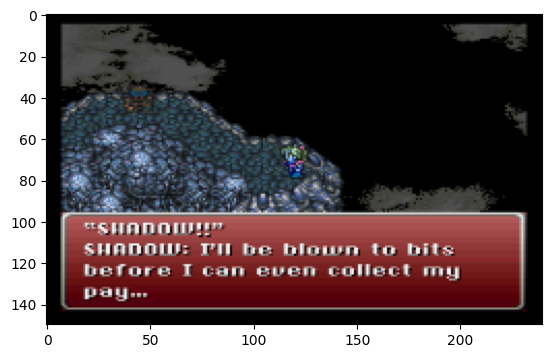

In [46]:
query = cv2.imread('..\FFVI\\Dialog\\texto_baixo.png')

query = cv2.resize(query, (240,150))

# query_height, query_width = query.shape
# train_height, train_width = train.shape
plt.imshow(query)

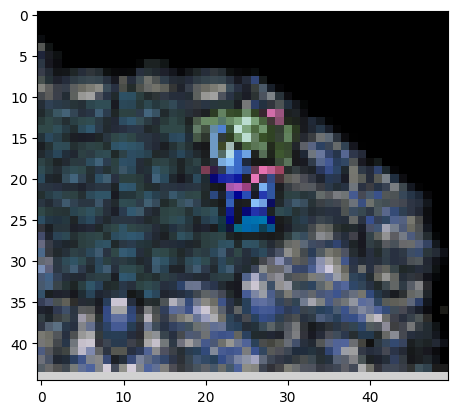

In [59]:
def cortar_quadrado_central(imagem):
    # Obtém as dimensões da imagem
    altura_imagem, largura_imagem, _ = imagem.shape

    #Caracteristicas Corte
    largura, altura = 50, 45

    # Calcula as coordenadas do canto superior esquerdo do quadrado central
    x = int((largura_imagem - largura) / 2)
    y = int((altura_imagem - altura) / 2)

    # Corta a região da imagem para obter o quadrado central
    quadrado_central = imagem[y:y+altura, x:x+largura]

    # Retorna o quadrado central
    return quadrado_central

# Carrega a imagem
imagem = query

# Corta o quadrado central com as dimensões desejadas e o offset especificado
quadrado_central = cortar_quadrado_central(imagem)

# Mostra o quadrado central com offset
plt.imshow(quadrado_central)



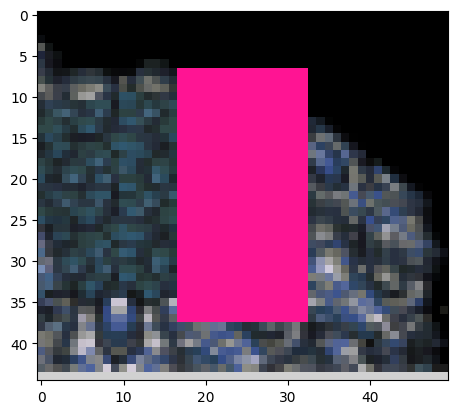

In [61]:
def desenhar_retangulo_central(imagem):
    # Obtém as dimensões da imagem
    altura_imagem, largura_imagem, _ = imagem.shape

    #Caracteristicas retangulo
    largura, altura = 15, 30
    cor = (255, 20, 147)

    # Calcula as coordenadas do retângulo para que ele fique centralizado
    x = int((largura_imagem - largura) / 2)
    y = int((altura_imagem - altura) / 2)

    # Desenha o retângulo na imagem
    cv2.rectangle(imagem, (x, y), (x + largura, y + altura), cor, thickness=cv2.FILLED)

    # Retorna a imagem com o retângulo desenhado
    return imagem

# Carrega a imagem
imagem = quadrado_central

# Desenha o retângulo central na imagem
imagem_com_retangulo = desenhar_retangulo_central(imagem)

# Mostra a imagem com o retângulo
plt.imshow(imagem_com_retangulo)


In [49]:
# color = (0, 255, 0)

# thickness = 2

# rectangle_output = cv2.cvtColor(query_g, cv2.COLOR_GRAY2BGR)
# cv2.rectangle(rectangle_output, (160, 70), (100, 140), color=(255,0,0), thickness=2)

# # player (118, 125), (138, 90)
# # area em volta (160, 70), (100, 140)
# plt.imshow(rectangle_output)

In [50]:
# regiao_recortada = query[70:140, 100:160]
# plt.imshow(regiao_recortada)

# # player (118, 125), (138, 90)
# # area em volta (160, 70), (100, 140)

In [51]:
# color = (0, 255, 0)

# thickness = 1

# cv2.rectangle(regiao_recortada, (35, 20), (20, 50), color=(255, 20, 147), thickness=2)

# # player (118, 125), (138, 90)
# # area em volta (160, 70), (100, 140)
# plt.imshow(regiao_recortada)

In [52]:
# cv2.rectangle(regiao_recortada, (35, 20), (20, 50), color=(255, 20, 147), thickness=cv2.FILLED)

# # player (118, 125), (138, 90)
# # area em volta (160, 70), (100, 140)
# plt.imshow(regiao_recortada)

In [53]:
imagem_com_retangulo

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [115,  87,  42, ...,  39,  20,   0],
       [ 95, 105,  81, ...,  68,  28,  28],
       [209, 209, 209, ..., 209, 209, 209]], dtype=uint8)

In [56]:
# import cv2
# import numpy as np
# from collections import Counter

# def ind_cores_mais_frequentes(imagem, cor_referencia=None):
#     # Converte a imagem para uma lista de pixels
#     pixels = imagem.flatten().tolist()
    
#     # Remove a cor de referência, se fornecida
#     if cor_referencia:
#         pixels = [pixel for pixel in pixels if pixel != cor_referencia]
    
#     # Verifica se há pelo menos um pixel na lista
#     if not pixels:
#         return "Nenhum pixel na imagem após a exclusão da cor de referência."
                
#     # Conta a frequência de cada pixel
#     frequencias = Counter(pixels)
    
#     # Encontra os três pixels mais frequentes
#     pixels_mais_frequentes = frequencias.most_common(3)
    
#     # Retorna os valores dos pixels mais frequentes
#     return [pixel[0] for pixel in pixels_mais_frequentes]
# # Define a cor azul como a cor de referência (BGR)
# cor_referencia = (255, 20, 147)

# # Identifica as 3 cores mais frequentes na imagem, excluindo a cor azul
# cores_mais_frequentes = ind_cores_mais_frequentes(imagem_com_retangulo, cor_referencia)
# print("As 3 cores mais frequentes na imagem, excluindo a cor de referência, são:", cores_mais_frequentes)


As 3 cores mais frequentes na imagem, excluindo a cor de referência, são: [0, 255, 209]


In [62]:
import cv2
import numpy as np
from collections import Counter

def cores_mais_frequentes(imagem, cor_referencia=None):
    # Inicializa uma lista para armazenar todas as cores na imagem
    todas_cores = []
    
    # Itera sobre cada pixel na imagem
    for linha in imagem:
        for pixel in linha:
            # Adiciona a cor à lista de todas as cores
            todas_cores.append(tuple(pixel))
    
    # Remove a cor de referência, se fornecida
    if cor_referencia:
        todas_cores = [cor for cor in todas_cores if cor != cor_referencia]
    
    # Verifica se há pelo menos uma cor na lista
    if not todas_cores:
        return "Nenhuma cor na imagem após a exclusão da cor de referência."
                
    # Conta a frequência de cada cor
    frequencias = Counter(todas_cores)
    
    # Encontra as três cores mais frequentes
    cores_mais_frequentes = frequencias.most_common(3)
    
    # Retorna as cores mais frequentes em formato BGR
    return [cor[0][::-1] for cor in cores_mais_frequentes]

# Carrega a imagem
imagem = imagem_com_retangulo

# Define a cor azul como a cor de referência (BGR)
cor_referencia = (255, 20, 147)

# Identifica as 3 cores mais frequentes na imagem, excluindo a cor azul
cores_mais_frequentes = cores_mais_frequentes(imagem, cor_referencia)
print("As 3 cores mais frequentes na imagem, excluindo a cor azul, são:", cores_mais_frequentes)

As 3 cores mais frequentes na imagem, excluindo a cor azul, são: [(0, 0, 0), (209, 209, 209), (72, 72, 48)]


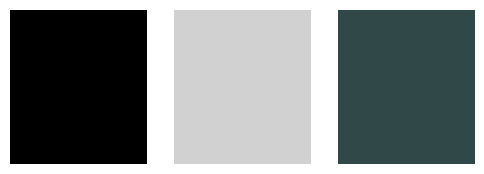

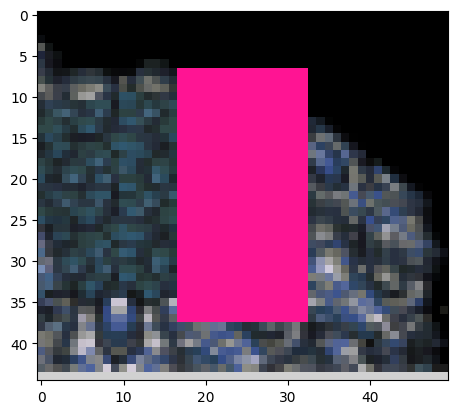

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def mostrar_cores(lista_cores):
    fig, axs = plt.subplots(1, len(lista_cores), figsize=(len(lista_cores)*2, 2))
    
    for i, cor in enumerate(lista_cores):
        cor_rgb = np.array(cor[::-1]) / 255.0  # Converte de formato BGR para RGB e normaliza
        axs[i].imshow([[cor_rgb]], extent=[0, 1, 0, 1], aspect='auto')
        axs[i].axis('off')

    plt.show()

# Exemplo de uso
mostrar_cores(cores_mais_frequentes)
plt.imshow(imagem_com_retangulo)
